In [5]:
import pandas as pd
import numpy as np
import datetime
import json
import requests
import pathlib

import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [3]:
url = "http://gbfs.citibikenyc.com/gbfs/gbfs.json"
data_urls = requests.get(url).json()

station_status_url =data_urls['data']['en']['feeds'][2]['url']
station_information_url = data_urls['data']['en']['feeds'][1]['url']
 
posix_stamp = data_urls['last_updated']
last_update = datetime.datetime.fromtimestamp(posix_stamp)
print(f"Last update was: {last_update}") 

station_information = requests.get(station_information_url).json()
df = pd.DataFrame.from_dict(station_information['data']['stations'])
# df.head()

Last update was: 2020-08-15 09:08:00


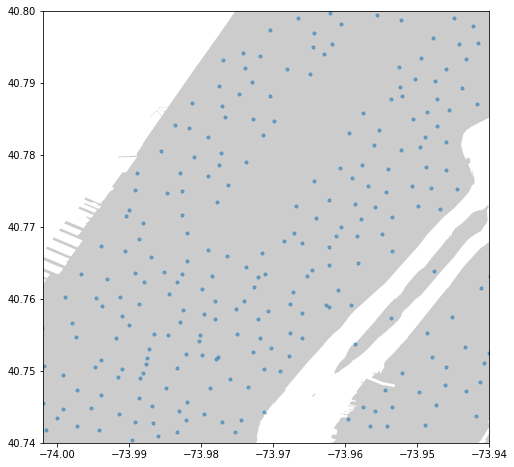

In [16]:
shapefile = pathlib.Path.cwd().parent.joinpath('Borough Boundaries','geo_export_924eacb7-5f5c-4927-8102-f56c2ecb6c41.shp') 

street_map = gpd.read_file(shapefile)
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
geo_df = gpd.GeoDataFrame(df,geometry = geometry)

fig, ax = plt.subplots(figsize=(8,8))

street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=10)

plt.xlim(-74.002,-73.94)
plt.ylim( 40.74,40.8)

plt.show()